In [56]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

# Ensemble plotter

In [57]:
Nx, Ny, Nz = 64, 1, 64
et = 1.0

def load(Nx,Ny,Nz,et):
    base_fn = 'output_swe_vortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

debug
(1, 10, 65, 2, 65)
(65, 65)
5
5


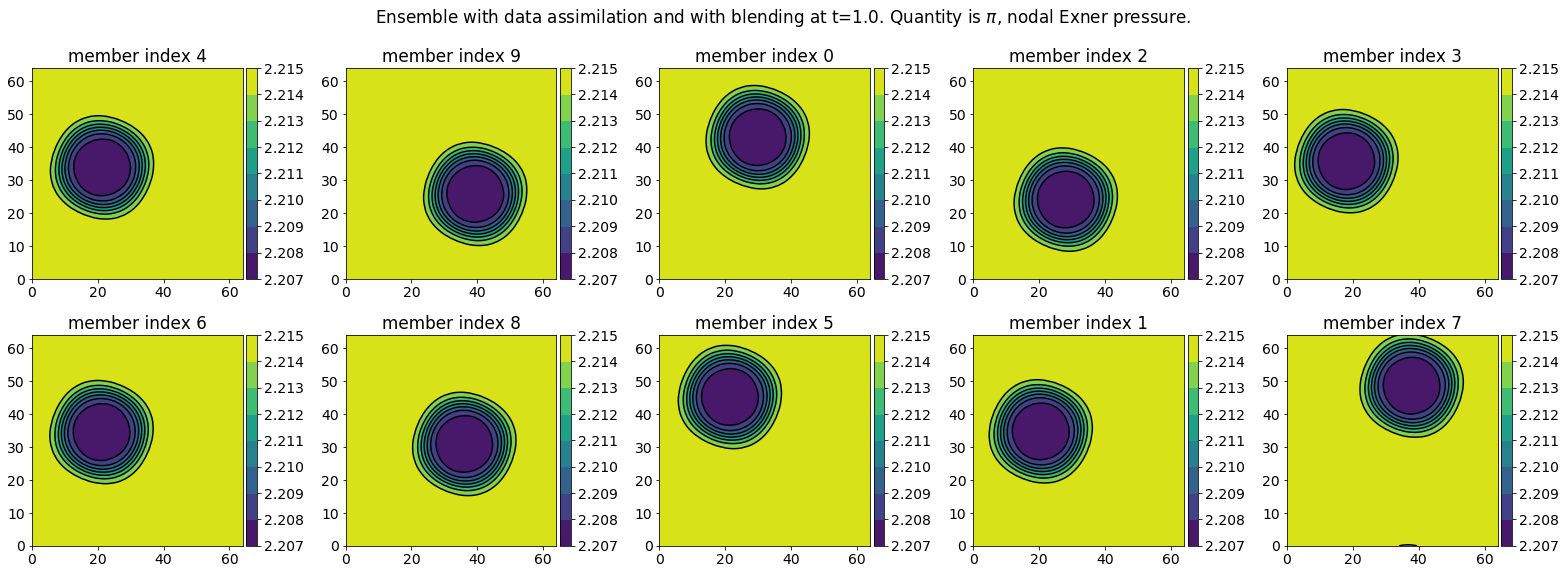

In [61]:
import random

random.seed(444)

N = 10
sfx = 'noda_p0.5'
sfx = 'debug'
# sfx = 'wdawloc_1.0_rhou_rhow_p0.5'
# sfx = tc.cb_suffix(1,0, '%s' %(sfx))
print(sfx)
attribute = 'p2_nodes'

times = [0.0]
tag = 'ic'

times = [0.01]
tag = tags[9]

ens = tc.get_ensemble(times, N, attribute, sfx, tag=tag, inner=True)
print(ens.shape)
mean = np.mean(ens[0],axis=0)[:,0,:]
print(np.array(mean).shape)
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()

for ens_at in ens:
    ncolslen = int((ens_at.shape)[0]/2)
    print(ncolslen)
#     fs = (18,6)
    fs = (14,8) # 2x2
    fs = (22,12)

    arr_lst = []
    for n, arr in enumerate(ens_at):
        arr = arr[:,1,:].T
#         arr -= arr.min()

        arr_lst.append([arr, 'member index %i' %n])
#     arr_lst = [[arr[:,0,:].T,'member index %i' %n] for n,arr in enumerate(ens_at)]
    arr_lst = random.sample(arr_lst, k=10)
#     arr_lst.append(mean)
    nn = 1 if N == 2 else 2
    ncolslen = int(len(arr_lst)/nn)
    print(ncolslen)

    pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

#     x_axs = np.arange(-10.0,12.5,2.5)
#     y_axs = np.arange(0,12.5,2.5)
#     x_loc = np.linspace(0,Nx-1,len(x_axs))
#     y_loc = np.linspace(0,Ny-1,len(y_axs))
#     x_label = r'x [km]'
#     y_label = r'y [km]'

#     pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

    st = "Ensemble with data assimilation and with blending at t=1.0. Quantity is %s." %attr_labels[attribute]
    _ = pl.plot(aspect='equal',method='contour',suptitle=st)
#     pl.save_fig('../img/rb_ens_%s_ic' %sfx)